## Making land-use specific files

In [56]:
import matplotlib.pyplot as plt
import numpy as np
msr_data = np.load('UK_MSR.npy')

In [7]:
msr_data.shape

(1200, 112, 82)

In [8]:
ssr = np.zeros((400,112,82))
for i in range(400):
    ssr[i,:,:] = msr_data[3*i,:,:]+msr_data[3*i+1,:,:]+msr_data[3*i+2,:,:]

In [10]:
np.save("UK_SSR_all.npy", ssr)

In [51]:
import xarray
land_file = '~/UKCP18/ukcp-other/landuse_ssp5-baseline_osgb12km.nc'
land_obj = xarray.open_dataset(land_file)
land = np.array(land_obj.LC_area_share)

#0=cropland_other
#1=cropland_2G bioenergy
#2=pasture
#3=forest_unmanaged#
#4=forest_managed
#5=other
#6=built-up
 
 #time has 11: 2005, 2010, 2020, 2030...

# Giving land the same dimensions:
land = land[2:8,:,:,:]
land = np.repeat(land,10,axis=0)
print(land.shape)

(60, 7, 112, 82)


In [59]:
mask_file = '~/UKCP18/ukcp-other/land-sea_mask_uk_12km.nc'
mask_obj = xarray.open_dataset(mask_file)
mask = np.array(mask_obj.lsm)
# Getting rid of france

In [62]:
summer_ssr = ssr[2::4,:,:] #Starting at index 2 (summer 1980) and counting up in 4s
summer_ssr = summer_ssr[-60:,:,:]
print(summer_ssr.shape) # Just the last 60 years, 2020-2080
np.save("summer_ssr_2020_2080.npy", summer_ssr)

(60, 112, 82)


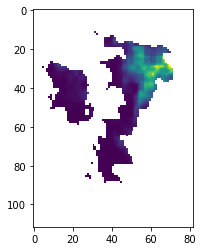

In [63]:
summer_ssr_cropland_other = summer_ssr*land[:,0,:,:]*mask
plt.imshow(summer_ssr_cropland_other[0,:,:])
np.save("summer_ssr_cropland_other_2020_2080.npy", summer_ssr_cropland_other)

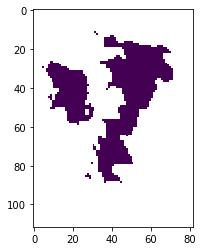

In [67]:
summer_ssr_cropland_bioenergy = summer_ssr*land[:,1,:,:]*mask
plt.imshow(summer_ssr_cropland_bioenergy[59,:,:])
np.save("summer_ssr_cropland_bioenergy_2020_2080.npy", summer_ssr_cropland_bioenergy)

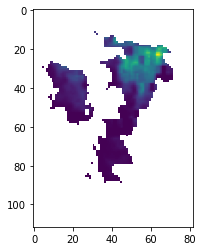

In [68]:
summer_ssr_pasture = summer_ssr*land[:,2,:,:]*mask
plt.imshow(summer_ssr_pasture[59,:,:])
np.save("summer_ssr_pasture_2020_2080.npy", summer_ssr_pasture)

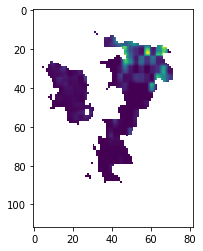

In [69]:
summer_ssr_unmanaged_forest = summer_ssr*land[:,3,:,:]*mask
plt.imshow(summer_ssr_unmanaged_forest[59,:,:])
np.save("summer_ssr_unmanaged_forest_2020_2080.npy", summer_ssr_unmanaged_forest)

In [1]:
summer_ssr_managed_forest = summer_ssr*land[:,4,:,:]*mask
plt.imshow(np.average(summer_ssr_managed_forest[50:60,:,:]))
np.save("summer_ssr_managed_forest_2020_2080.npy", summer_ssr_managed_forest)

NameError: name 'summer_ssr' is not defined

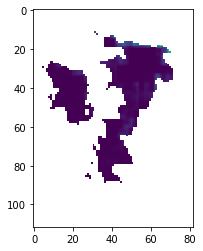

In [73]:
summer_ssr_other = summer_ssr*land[:,5,:,:]*mask
plt.imshow(summer_ssr_other[59,:,:])
np.save("summer_ssr_other_2020_2080.npy", summer_ssr_other)

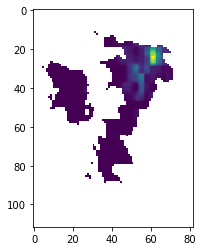

In [74]:
summer_ssr_built_up = summer_ssr*land[:,6,:,:]*mask
plt.imshow(summer_ssr_built_up[59,:,:])
np.save("summer_ssr_built_up_2020_2080.npy", summer_ssr_built_up)